<a href="https://colab.research.google.com/github/PisutSukpool/BADS7105-CRM-analytics-and-intelligence/blob/main/Homework%2007/Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta 
from datetime import datetime,date   
from matplotlib.ticker import PercentFormatter
import copy
import matplotlib as mpl

df = pd.read_csv('/content/drive/My Drive/BADS_NIDA/CRM/hw7_product_recommendation/survey_product_recommendation.csv')
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font',family='TH Sarabun New',size=20)

df.head()

,ประทับเวลา,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,3/20/2021 11:53:45,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย
1,3/20/2021 11:54:01,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย
2,3/20/2021 11:54:05,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
3,3/20/2021 11:54:13,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
4,3/20/2021 11:54:18,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,NaN,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย


In [4]:
mapper = {'เคย' : 1 ,'ไม่เคย' : 0 }
df_encode = df.replace(mapper)
df_encode = df_encode.drop(columns=['ประทับเวลา'])
df_encode_fillna = df_encode.fillna(0)
df_encode_fillna.head()

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1.0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0.0,1,0,0,0.0,0,0,0,0.0,0,0.0,0,0,1,1,1
1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,0,1,1,1,0,1.0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1.0,1,1,0,1.0,0,1,0,0.0,0,1.0,1,0,1,0,1
2,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,0,1,1.0,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,1.0,1,0,1,0.0,0,1,0,0.0,0,0.0,1,0,1,1,1
3,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1.0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,1,0,0,1,0,0.0,1,0,0,0.0,1,0,0,0.0,0,0.0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1.0,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0.0,1,0,1,0.0,0,0,0,1.0,0,0.0,1,0,1,1,1


# **Association Rule**

In [5]:
df_market_basket = df_encode_fillna
mapper = {1 : True ,0 : False }
df_market_basket_rep = df_market_basket.replace(mapper)
df_market_basket_rep

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,True,False,False,False,True,True,True,False,False,False,False,True,False,True,True,False,True,False,True,True,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True
1,False,True,False,True,False,False,False,True,False,False,False,False,True,True,False,True,True,False,True,False,True,True,True,False,True,False,False,True,True,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,True,True,True,False,True,False,True,False,False,False,True,True,False,True,False,True
2,True,False,False,False,False,False,False,True,True,False,False,True,True,True,False,False,True,True,True,False,True,True,False,True,True,True,False,True,False,True,True,True,True,True,True,True,False,True,True,True,False,False,False,False,True,True,False,True,False,False,True,False,False,False,False,True,False,True,True,True
3,False,False,False,True,False,True,False,False,False,False,True,True,True,True,False,True,True,True,True,True,False,False,True,True,True,False,False,False,False,True,False,True,True,False,True,False,True,True,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True
4,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True,False,True,False,False,True,True,False,True,False,False,False,True,False,False,True,True,False,True,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,True,True,True
5,True,True,False,False,False,False,False,True,False,False,False,True,True,True,False,False,True,True,True,False,False,True,True,True,True,False,False,True,False,True,False,True,True,False,False,True,False,True,False,False,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,True
6,False,False,False,True,False,False,False,True,False,False,False,True,True,False,False,True,True,False,True,False,False,True,False,True,True,False,False,False,False,True,False,True,True,False,True,True,False,True,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,True,False,True,True,True
7,False,False,False,False,False,False,False,True,False,False,False,True,True,True,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
8,False,False,False,False,False,True,False,True,False,False,False,True,True,True,False,False,True,False,True,False,False,True,True,True,True,False,False,False,True,True,False,True,True,False,True,False,False,True,True,False,False,False,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False,True,True
9,False,True,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True,True,False,True,False,True,False,

In [6]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
frequent_itemsets_ap = apriori(df_market_basket_rep, min_support=0.5, use_colnames=True)

In [7]:
print(frequent_itemsets_ap)

       support                                           itemsets
0     0.543478                                         (คอลลาเจน)
1     0.717391                                 (ต้นไม้ประดับห้อง)
2     0.869565                                         (หมอนข้าง)
3     0.673913                                          (ตาชั่ง )
4     0.934783                                     (กะหรี่(ปั๊บ))
...        ...                                                ...
5834  0.500000  (ครีมกันแดด, กระเป๋า, หมูแดดเดียว, เม็ดมะม่วงห...
5835  0.500000  (ครีมกันแดด, กระเป๋า, เม็ดมะม่วงหิมพานต์, หมอน...
5836  0.521739  (ครีมกันแดด, กระเป๋า, หมูแดดเดียว, เม็ดมะม่วงห...
5837  0.521739  (ครีมกันแดด, กระเป๋า, หมูแดดเดียว, เม็ดมะม่วงห...
5838  0.500000  (ครีมกันแดด, กระเป๋า, หมูแดดเดียว, เม็ดมะม่วงห...

[5839 rows x 2 columns]


In [8]:
rules = association_rules(frequent_itemsets_ap,metric='lift',min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(กะหรี่(ปั๊บ)),(คอลลาเจน),0.934783,0.543478,0.521739,0.558140,1.026977,0.013705,1.033181
1,(คอลลาเจน),(กะหรี่(ปั๊บ)),0.543478,0.934783,0.521739,0.960000,1.026977,0.013705,1.630435
2,(คอลลาเจน),(กระเป๋า),0.543478,1.000000,0.543478,1.000000,1.000000,0.000000,inf
3,(กระเป๋า),(คอลลาเจน),1.000000,0.543478,0.543478,0.543478,1.000000,0.000000,1.000000
4,(คอลลาเจน),(ชาบู),0.543478,1.000000,0.543478,1.000000,1.000000,0.000000,inf
5,(ชาบู),(คอลลาเจน),1.000000,0.543478,0.543478,0.543478,1.000000,0.000000,1.000000
6,(เม็ดมะม่วงหิมพานต์),(คอลลาเจน),0.913043,0.543478,0.500000,0.547619,1.007619,0.003781,1.009153
7,(คอลลาเจน),(เม็ดมะม่วงหิมพานต์),0.543478,0.913043,0.500000,0.920000,1.007619,0.003781,1.086957
8,(คอลลาเจน),(โรตี),0.543478,0.956522,0.543478,1.000000,1.045455,0.023629,inf
9,(โรตี),(คอลลาเจน),0.956522,0.543478,0.543478,0.568182,1.045455,0.023629,1.057208


In [9]:
rules[(rules['lift']>=1) & (rules['confidence']>=0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(กะหรี่(ปั๊บ)),(คอลลาเจน),0.934783,0.543478,0.521739,0.558140,1.026977,0.013705,1.033181
1,(คอลลาเจน),(กะหรี่(ปั๊บ)),0.543478,0.934783,0.521739,0.960000,1.026977,0.013705,1.630435
2,(คอลลาเจน),(กระเป๋า),0.543478,1.000000,0.543478,1.000000,1.000000,0.000000,inf
3,(กระเป๋า),(คอลลาเจน),1.000000,0.543478,0.543478,0.543478,1.000000,0.000000,1.000000
4,(คอลลาเจน),(ชาบู),0.543478,1.000000,0.543478,1.000000,1.000000,0.000000,inf
...,...,...,...,...,...,...,...,...,...
383785,(เนื้อวากิล),"(ครีมกันแดด, กระเป๋า, หมูแดดเดียว, เม็ดมะม่วงห...",0.673913,0.543478,0.500000,0.741935,1.365161,0.133743,1.769022
383786,(กะหรี่(ปั๊บ)),"(ครีมกันแดด, กระเป๋า, หมูแดดเดียว, เม็ดมะม่วงห...",0.934783,0.500000,0.500000,0.534884,1.069767,0.032609,1.075000
383787,(ชาบู),"(ครีมกันแดด, กระเป๋า, หมูแดดเดียว, เม็ดมะม่วงห...",1.000000,0.500000,0.500000,0.500000,1.000000,0.000000,1.000000
383788,(เนื้อย่าง),"(ครีมกันแดด, กระเป๋า, หมูแดดเดียว, เม็ดมะม่วงห...",0.717391,0.521739,0.500000,0.696970,1.335859,0.125709,1.578261


In [14]:
rules_head = rules[(rules['lift']>=1) & (rules['confidence']>=0.5)]
rules_head["antecedents"] = rules_head["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules_head["consequents"] = rules_head["consequents"].apply(lambda x: list(x)[0]).astype("unicode")
rules_head = rules_head.sort_values(by='lift',ascending=False)
rules_head.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
135542,หมูแดดเดียว,เนื้อวากิล,0.521739,0.652174,0.5,0.958333,1.469444,0.159735,8.347826
376178,ครีมกันแดด,เนื้อวากิล,0.521739,0.652174,0.5,0.958333,1.469444,0.159735,8.347826
244644,หมูแดดเดียว,เนื้อวากิล,0.521739,0.652174,0.5,0.958333,1.469444,0.159735,8.347826
334151,กระเป๋า,เนื้อวากิล,0.521739,0.652174,0.5,0.958333,1.469444,0.159735,8.347826
334153,กระเป๋า,เนื้อวากิล,0.521739,0.652174,0.5,0.958333,1.469444,0.159735,8.347826
135154,เนื้อย่าง,เนื้อวากิล,0.521739,0.652174,0.5,0.958333,1.469444,0.159735,8.347826
376144,ครีมกันแดด,เนื้อวากิล,0.521739,0.652174,0.5,0.958333,1.469444,0.159735,8.347826
376481,โรตี,ครีมกันแดด,0.521739,0.652174,0.5,0.958333,1.469444,0.159735,8.347826
335423,ครีมกันแดด,เนื้อวากิล,0.521739,0.652174,0.5,0.958333,1.469444,0.159735,8.347826
335421,ครีมกันแดด,เนื้อวากิล,0.521739,0.652174,0.5,0.958333,1.469444,0.159735,8.347826


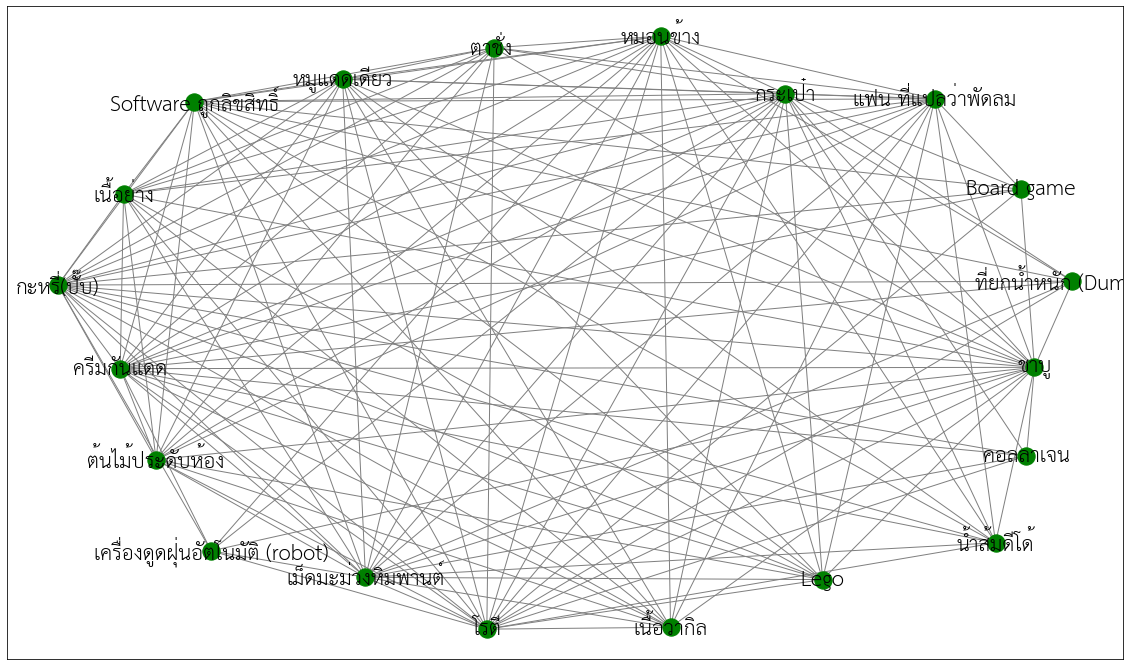

In [17]:
import networkx as nx
plt.figure(3,figsize=(20,12))
GA=nx.from_pandas_edgelist(rules_head,source='antecedents',target='consequents')
pos = nx.spring_layout(GA,k=500)
#GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
plt.figure(3,figsize=(20,12))
nx.draw_networkx_nodes(GA, pos ,node_color='green')
nx.draw_networkx_labels(GA, pos,font_family='TH Sarabun New',font_size=20)
nx.draw_networkx_edges(G = GA, pos = pos, edge_color='gray') 
plt.show()